## Generating Fake Data 
### Creating The Widget Factory

Here we explore methods for generating fake data and create a dataset for our fake widget factory to be used in future analyses.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
import random
import pprint

In [2]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

## Faker
A python package for easily creating fake data

In [3]:
# initialize a generator
fake = Faker()

#create some fake data
print(fake.name())
print(fake.date_between(start_date='-30y', end_date='today'))
print(fake.color_name())

Ryan White
2009-10-04
Green


In [4]:
# create a list of color names
colors = [fake.color_name() for x in range(4)]
colors

['DarkSlateBlue', 'SandyBrown', 'LawnGreen', 'FloralWhite']

In [5]:
# create a fake profile
pp = pprint.PrettyPrinter(indent=2)
pp.pprint(fake.profile())

{ 'address': '475 Carmen Mission\nNew Daisyberg, DC 45531',
  'birthdate': datetime.date(1974, 4, 21),
  'blood_group': 'A-',
  'company': 'Morris-Clay',
  'current_location': (Decimal('87.339283'), Decimal('123.508787')),
  'job': 'Illustrator',
  'mail': 'williamskatrina@hotmail.com',
  'name': 'Tony Blankenship',
  'residence': '1662 Donna Manors\nAliberg, AL 95578',
  'sex': 'M',
  'ssn': '269-53-3579',
  'username': 'kaufmanjessica',
  'website': ['https://wade-jimenez.com/', 'http://www.mayer-hodge.com/']}


In [6]:
fake_workers = [
    {'Worker Name':fake.name(), 
     'Hire Date':fake.date_between(start_date='-30y', end_date='today')
    } for x in range(10)]
                 
fake_workers

[{'Worker Name': 'Shannon Ellis', 'Hire Date': datetime.date(2015, 9, 2)},
 {'Worker Name': 'Destiny Gonzalez', 'Hire Date': datetime.date(2013, 1, 21)},
 {'Worker Name': 'Zachary Diaz', 'Hire Date': datetime.date(2012, 5, 5)},
 {'Worker Name': 'Nicole Hahn', 'Hire Date': datetime.date(2003, 12, 21)},
 {'Worker Name': 'Patrick Hamilton', 'Hire Date': datetime.date(2016, 10, 10)},
 {'Worker Name': 'Alyssa Taylor', 'Hire Date': datetime.date(2007, 11, 25)},
 {'Worker Name': 'Matthew Moreno', 'Hire Date': datetime.date(1994, 6, 24)},
 {'Worker Name': 'Edward Thomas', 'Hire Date': datetime.date(2010, 11, 20)},
 {'Worker Name': 'Alexandra Moore', 'Hire Date': datetime.date(1995, 10, 29)},
 {'Worker Name': 'Amy Calderon', 'Hire Date': datetime.date(2009, 6, 26)}]

### numpy.random

In [7]:
# numpys random choice to select a color from our colors list
np.random.choice(colors)

'DarkSlateBlue'

In [8]:
# generate an array of colors with a list comprehension
[np.random.choice(colors) for x in range(5)]

['FloralWhite', 'FloralWhite', 'SandyBrown', 'DarkSlateBlue', 'FloralWhite']

In [9]:
# generate an array of colors with differing probabilities
[np.random.choice(colors, p=[0.1, 0.6, 0.1, 0.2]) for x in range(10)]

['SandyBrown',
 'SandyBrown',
 'SandyBrown',
 'SandyBrown',
 'SandyBrown',
 'SandyBrown',
 'DarkSlateBlue',
 'LawnGreen',
 'SandyBrown',
 'SandyBrown']

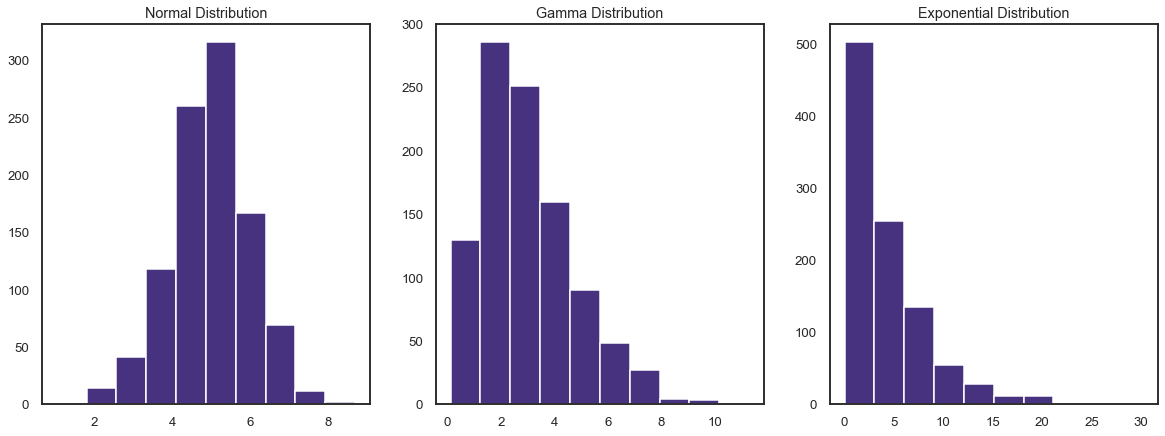

In [10]:
# generate normal distribution
normal_dist = np.random.normal(loc=5, scale=1, size=1000)

# generate gamma distribution
gamma_dist = np.random.gamma(shape=3, scale=1, size=1000)

# generate exponential distribution
exp_dist = np.random.exponential(scale=4, size=1000)

# histograms to visualize the distributions
fig, [ax1, ax2, ax3] = plt.subplots(1,3)
ax1.hist(normal_dist)
ax1.set_title('Normal Distribution')

ax2.hist(gamma_dist)
ax2.set_title('Gamma Distribution')

ax3.hist(exp_dist)
ax3.set_title('Exponential Distribution')

plt.show()

### Making our Widget Factory DataFrames

In [11]:
# create some fake data
fake = Faker()

# function to create a dataframe with fake values for our workers
def make_workers(num):
    
    # lists to randomly assign to workers
    status_list = ['Full Time', 'Part Time', 'Per Diem']
    team_list = [fake.color_name() for x in range(4)]
    

    fake_workers = [{'Worker ID':x+1000,
                  'Worker Name':fake.name(), 
                  'Hire Date':fake.date_between(start_date='-30y', end_date='today'),
                  'Worker Status':np.random.choice(status_list, p=[0.50, 0.30, 0.20]), # assign items from list with different probabilities
                  'Team':np.random.choice(team_list)} for x in range(num)]
        
    return fake_workers

worker_df = pd.DataFrame(make_workers(num=5000))
worker_df.head()

,Worker ID,Worker Name,Hire Date,Worker Status,Team
0,1000,Paul Clark,2020-09-12,Part Time,SeaGreen
1,1001,Andrea White,2001-11-08,Full Time,Crimson
2,1002,Daniel Taylor,2002-06-10,Part Time,LightSteelBlue
3,1003,Ann Manning,2019-09-13,Per Diem,Crimson
4,1004,Brenda Gonzales,2000-12-23,Part Time,Crimson


In [12]:
# function to create widget data

def make_widget_data(num):
    
    fake_widgets = [{'Item Number':id(y),
                     'Step 1':np.random.gamma(shape=3, scale=1),
                     'Step 2':np.random.normal(5), 
                     'Step 3':np.random.exponential(4)} for y in range(num)]
    
    return fake_widgets

# empty list to store our widget dataframes in    
dfs_list = []

# now lets make some widget data for each worker
# iterate through the worker dataframe
for index, row in worker_df.iterrows():
    
    # not all workers work at the same rate - or the same number of hours
    # randomly select a number of widgets for them to create based on 'worker status'
    if row['Worker Status'] == 'Full Time':
        num_widgets = random.randrange(500, 1000)
    elif row['Worker Status'] == 'Part Time':
        num_widgets = random.randrange(100, 500)
    else:
        num_widgets = random.randrange(1, 1000)
    
    # make widgets for each worker
    tmp_widgets = pd.DataFrame(make_widget_data(num=num_widgets))
    
    # add worker id so we know who made the widget
    tmp_widgets['Worker ID'] = row['Worker ID']
    
    # make sure item number is unique by appending worker id
    tmp_widgets['Item Number'] = tmp_widgets['Item Number'].astype('str')+ '-' + tmp_widgets['Worker ID'].astype('str')
    
    # append to df list
    dfs_list.append(tmp_widgets)
    
# concatenate all the dfs 
widget_df = pd.concat(dfs_list)
print(widget_df.shape)
widget_df.head()


(2817555, 5)


,Item Number,Step 1,Step 2,Step 3,Worker ID
0,4411865360-1000,0.635369,4.377276,2.734590,1000
1,4411865392-1000,2.047647,3.870909,12.698644,1000
2,4411865424-1000,0.870676,6.347963,7.655127,1000
3,4411865456-1000,2.938096,3.933764,3.550750,1000
4,4411865488-1000,2.951892,3.363985,3.820368,1000


In [14]:
worker_df.to_csv('data/workers.csv', index=False)
widget_df.to_csv('data/widgets.csv', index=False)